Jaciane de Oliveira Cruz - 118110412

O código deste notebook é baseado em: https://www.datacamp.com/projects/38

In [32]:
import requests
from bs4 import BeautifulSoup
import nltk

In [73]:
alice = requests.get("https://www.gutenberg.org/cache/epub/11/pg11-images.html")
prince = requests.get("https://www.gutenberg.org/cache/epub/1232/pg1232-images.html")
pride = requests.get("https://www.gutenberg.org/cache/epub/42671/pg42671-images.html")

alice.encoding = 'utf-8'
prince.encoding = 'utf-8'
pride.encoding = 'utf-8'

html1 = alice.text
html2 = prince.text
html3 = pride.text


print(html1[0:2000])
print(html2[0:2000])
print(html3[0:2000])

<!DOCTYPE html>
<html lang="en" xml:lang="en">
<head>
<meta charset="utf-8">
<meta name="generator" content="HTML Tidy for HTML5 for Linux version 5.6.0">
<title>The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll</title>
<link rel="icon" href="images/cover.jpg" type="image/x-cover">
<style>/**/
body {
    background: #faebd0;
    margin-left: 20%;
    margin-right: 20%;
    text-align: justify
    }
h1, h2, h3, h4, h5 {
    text-align: center;
    font-style: normal;
    font-weight: normal;
    line-height: 1.5;
    margin-top: 0.5em;
    margin-bottom: 0.5em
    }
h1 {
    font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0
    }
h2 {
    font-size: 175%;
    margin-top: 2em;
    margin-bottom: 1em
    }
h3 {
    font-size: 150%;
    margin-top: 2em
    }
h4 {
    font-size: 120%
    }
h5 {
    font-size: 110%
    }
hr {
    width: 80%;
    margin-top: 2em;
    margin-

In [74]:
soup1 = BeautifulSoup(html1, 'html.parser')
soup2 = BeautifulSoup(html2, 'html.parser')
soup3 = BeautifulSoup(html3, 'html.parser')

text1 = soup1.get_text()
text2 = soup2.get_text()
text3 = soup3.get_text()

print(text1[32000:33000])
print("---------------")
print(text2[32000:33000])
print("---------------")
print(text3[32000:33000])


 comfits: this caused some noise and confusion, as the large birds complained that they could not taste theirs, and the small ones choked and had to be patted on the back. However, it was over at last, and they sat down again in a ring, and begged the Mouse to tell them something more.
“You promised to tell me your history, you know,” said Alice, “and why it is you hate—C and D,” she added in a whisper, half afraid that it would be offended again.
“Mine is a long and a sad tale!” said the Mouse, turning to Alice, and sighing.
“It is a long tail, certainly,” said Alice, looking down with wonder at the Mouse’s tail; “but why do you call it sad?” And she kept on puzzling about it while the Mouse was speaking, so that her idea of the tale was something like this:—

         “Fury said to a
         mouse, That he
        met in the
       house,
     ‘Let us
      both go to
       law: I will
        prosecute
         you.—Come,
           I’ll take no
           denial; We
 
-----------

In [75]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')


tokens1 = tokenizer.tokenize(text1)
tokens2 = tokenizer.tokenize(text2)
tokens3 = tokenizer.tokenize(text3)

print(tokens1[0:8])
print(tokens2[0:8])
print(tokens3[0:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Alice', 's', 'Adventures']
['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Prince', 'by']
['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice']


In [76]:
words1 = []

for word in tokens1:
  words1.append(word.lower())

words2 = []

for word in tokens2:
  words2.append(word.lower())

words3 = []

for word in tokens3:
  words3.append(word.lower())


print(words1[0:8])
print(words2[0:8])
print(words3[0:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 's', 'adventures']
['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'prince', 'by']
['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice']


In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
words_ns1 =  [word for word in words1 if word not in sw]
words_ns2 =  [word for word in words2 if word not in sw]
words_ns3 =  [word for word in words3 if word not in sw]

In [79]:
print(words_ns1[0:8])
print(words_ns2[0:8])
print(words_ns3[0:8])

['project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll']
['project', 'gutenberg', 'ebook', 'prince', 'nicolo', 'machiavelli', 'body', 'margin']
['project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'jane', 'austen', 'body']


In [80]:
freqdist1 = nltk.FreqDist(words_ns1)
freqdist2 = nltk.FreqDist(words_ns2)
freqdist3 = nltk.FreqDist(words_ns3)


In [81]:
freqdist1

FreqDist({'project': 89,
          'gutenberg': 99,
          'ebook': 14,
          'alice': 404,
          'adventures': 12,
          'wonderland': 8,
          'lewis': 4,
          'carroll': 4,
          'body': 3,
          'background': 1,
          'faebd0': 1,
          'margin': 38,
          'left': 21,
          '20': 3,
          'right': 38,
          'text': 17,
          'align': 6,
          'justify': 1,
          'h1': 2,
          'h2': 2,
          'h3': 2,
          'h4': 2,
          'h5': 2,
          'center': 6,
          'font': 14,
          'style': 1,
          'normal': 2,
          'weight': 3,
          'line': 3,
          'height': 6,
          '1': 51,
          '5': 5,
          'top': 21,
          '0': 24,
          '5em': 2,
          'bottom': 14,
          'size': 23,
          '300': 1,
          '6em': 2,
          'letter': 5,
          'spacing': 3,
          '12em': 2,
          'word': 12,
          '2em': 11,
          'indent': 9,
    

In [82]:
freqdist2

FreqDist({'project': 88,
          'gutenberg': 98,
          'ebook': 13,
          'prince': 225,
          'nicolo': 15,
          'machiavelli': 67,
          'body': 12,
          'margin': 46,
          'left': 37,
          '20': 4,
          'right': 13,
          'text': 18,
          'align': 6,
          'justify': 1,
          'h1': 2,
          'h2': 2,
          'h3': 2,
          'h4': 2,
          'h5': 2,
          'center': 6,
          'font': 17,
          'style': 3,
          'normal': 2,
          'weight': 6,
          'line': 6,
          'height': 4,
          '1': 88,
          '5': 18,
          'top': 19,
          '0': 22,
          '5em': 2,
          'bottom': 13,
          'size': 12,
          '300': 1,
          '6em': 3,
          'letter': 7,
          'spacing': 2,
          '12em': 1,
          'word': 15,
          '2em': 12,
          'indent': 9,
          '150': 1,
          '1em': 22,
          '130': 1,
          '120': 1,
          '110': 1

In [83]:
#@title Texto de título padrão
freqdist3

FreqDist({'project': 88,
          'gutenberg': 97,
          'ebook': 11,
          'pride': 58,
          'prejudice': 16,
          'jane': 295,
          'austen': 3,
          'body': 56,
          'margin': 38,
          'left': 91,
          '10': 7,
          'right': 61,
          'h1': 1,
          'h2': 1,
          'h3': 1,
          'h4': 1,
          'h5': 1,
          'h6': 1,
          'text': 15,
          'align': 10,
          'center': 6,
          'headings': 1,
          'centered': 1,
          'clear': 15,
          'p': 4,
          'top': 11,
          '0': 20,
          '75em': 2,
          'justify': 7,
          'bottom': 8,
          'hr': 4,
          'width': 6,
          '33': 1,
          '2em': 3,
          'auto': 9,
          'table': 38,
          'pagenum': 1,
          'uncomment': 1,
          'next': 73,
          'line': 9,
          'invisible': 1,
          'page': 8,
          'numbers': 2,
          'visibility': 1,
          'hidden': 1,


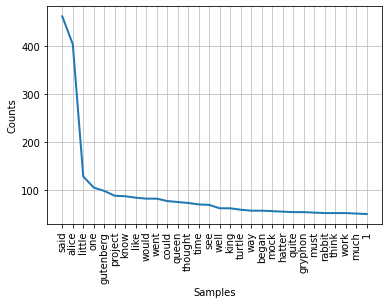

In [84]:
%matplotlib inline

freqdist1.plot(30)

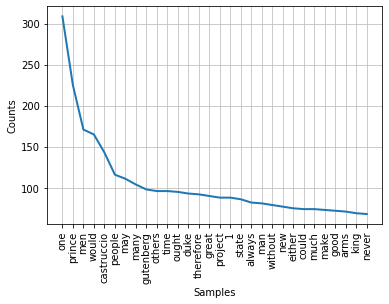

In [85]:
freqdist2.plot(30)

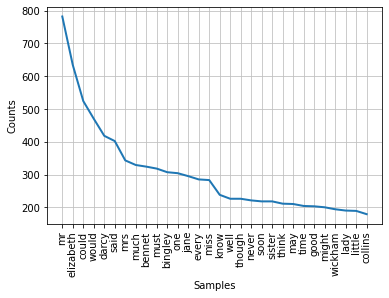

In [87]:
freqdist3.plot(30)

## Bigramas :

In [88]:
from nltk import bigrams
alice_bigrams = list(bigrams(words_ns1))

print(alice_bigrams)

[('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'alice'), ('alice', 'adventures'), ('adventures', 'wonderland'), ('wonderland', 'lewis'), ('lewis', 'carroll'), ('carroll', 'body'), ('body', 'background'), ('background', 'faebd0'), ('faebd0', 'margin'), ('margin', 'left'), ('left', '20'), ('20', 'margin'), ('margin', 'right'), ('right', '20'), ('20', 'text'), ('text', 'align'), ('align', 'justify'), ('justify', 'h1'), ('h1', 'h2'), ('h2', 'h3'), ('h3', 'h4'), ('h4', 'h5'), ('h5', 'text'), ('text', 'align'), ('align', 'center'), ('center', 'font'), ('font', 'style'), ('style', 'normal'), ('normal', 'font'), ('font', 'weight'), ('weight', 'normal'), ('normal', 'line'), ('line', 'height'), ('height', '1'), ('1', '5'), ('5', 'margin'), ('margin', 'top'), ('top', '0'), ('0', '5em'), ('5em', 'margin'), ('margin', 'bottom'), ('bottom', '0'), ('0', '5em'), ('5em', 'h1'), ('h1', 'font'), ('font', 'size'), ('size', '300'), ('300', 'margin'), ('margin', 'top'), ('top', '0'), ('0', '6e

In [89]:
prince_bigrams = list(bigrams(words_ns2))

print(prince_bigrams)

[('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'prince'), ('prince', 'nicolo'), ('nicolo', 'machiavelli'), ('machiavelli', 'body'), ('body', 'margin'), ('margin', 'left'), ('left', '20'), ('20', 'margin'), ('margin', 'right'), ('right', '20'), ('20', 'text'), ('text', 'align'), ('align', 'justify'), ('justify', 'h1'), ('h1', 'h2'), ('h2', 'h3'), ('h3', 'h4'), ('h4', 'h5'), ('h5', 'text'), ('text', 'align'), ('align', 'center'), ('center', 'font'), ('font', 'style'), ('style', 'normal'), ('normal', 'font'), ('font', 'weight'), ('weight', 'normal'), ('normal', 'line'), ('line', 'height'), ('height', '1'), ('1', '5'), ('5', 'margin'), ('margin', 'top'), ('top', '0'), ('0', '5em'), ('5em', 'margin'), ('margin', 'bottom'), ('bottom', '0'), ('0', '5em'), ('5em', 'h1'), ('h1', 'font'), ('font', 'size'), ('size', '300'), ('300', 'margin'), ('margin', 'top'), ('top', '0'), ('0', '6em'), ('6em', 'margin'), ('margin', 'bottom'), ('bottom', '0'), ('0', '6em'), ('6em', 'letter'), ('le

In [92]:
pride_bigrams = list(bigrams(words_ns3))

print(pride_bigrams)

[('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'pride'), ('pride', 'prejudice'), ('prejudice', 'jane'), ('jane', 'austen'), ('austen', 'body'), ('body', 'margin'), ('margin', 'left'), ('left', '10'), ('10', 'margin'), ('margin', 'right'), ('right', '10'), ('10', 'h1'), ('h1', 'h2'), ('h2', 'h3'), ('h3', 'h4'), ('h4', 'h5'), ('h5', 'h6'), ('h6', 'text'), ('text', 'align'), ('align', 'center'), ('center', 'headings'), ('headings', 'centered'), ('centered', 'clear'), ('clear', 'p'), ('p', 'margin'), ('margin', 'top'), ('top', '0'), ('0', '75em'), ('75em', 'text'), ('text', 'align'), ('align', 'justify'), ('justify', 'margin'), ('margin', 'bottom'), ('bottom', '0'), ('0', '75em'), ('75em', 'hr'), ('hr', 'width'), ('width', '33'), ('33', 'margin'), ('margin', 'top'), ('top', '2em'), ('2em', 'margin'), ('margin', 'bottom'), ('bottom', '2em'), ('2em', 'margin'), ('margin', 'left'), ('left', 'auto'), ('auto', 'margin'), ('margin', 'right'), ('right', 'auto'), ('auto', 'clear'), (

## Análise
**Compare as distribuições de frequências das palavras para 
cada livro e verifique se satisfazem a lei de zipf.**

* *De acordo com a lei de Zipf a frequência de uma palavra é inversamente o rancking, conforme com  os gráficos de frequências printados anteriormente percebe-se que o  fenômeno da cauda longa ocorre com os três livros escolhidos, satisfazendo assim a lei de zipf.*

**As palavras mais frequentes de alguma forma estão relacionados
com o enredo do livro?** 

* *Analizando novamente os gráficos temos no livro alice no país das maravilhas as palavras "alice", "queen", "rabbit" que são personagens essenciais para o decorrer da história, as maiores frequencias de palavras dos outros livros também seguem o mesmo padrão, como "prince" do o principe e "elizaberth" que é a personagem principal, "collins" também sendo um personagem, a palavra "lady" também é notório pelo seu gênero literário. Diante dos fatos citados, sim, a frequência das palavras estão relacionados ao enredo de cada livro.*